In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 2.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=536e2d3cf0f468a77d2d7b3ca3adaade7cea71d2ad1d16094a38e08cc2ee2360
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import matplotlib.pyplot as plt
import mglearn

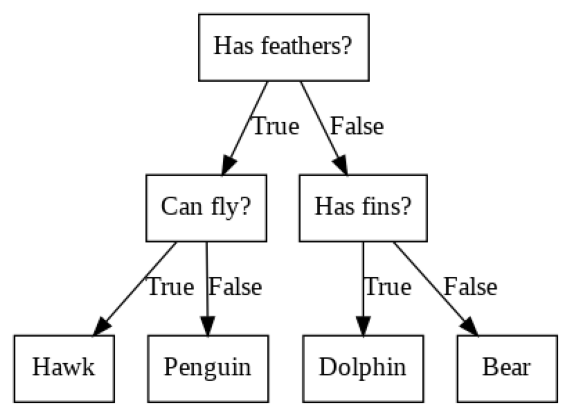

In [ ]:
plt.figure(figsize=(10,10))
mglearn.plots.plot_animal_tree()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [ ]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=cancer.target, 
                                                    test_size = 0.3,
                                                    random_state=77)

In [ ]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912


In [ ]:
for i in range(1,7,1):
  tree = DecisionTreeClassifier(max_depth=i, random_state=0)
  tree.fit(X_train, y_train)
  print(f"max_depth : {i}")
  print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
  print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

max_depth : 1
훈련 세트 정확도 : 0.932
테스트 세트 정확도 : 0.883
max_depth : 2
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912
max_depth : 3
훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.906
max_depth : 4
훈련 세트 정확도 : 0.985
테스트 세트 정확도 : 0.906
max_depth : 5
훈련 세트 정확도 : 0.992
테스트 세트 정확도 : 0.889
max_depth : 6
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.901


In [ ]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print(f"max_depth : {i}")
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

max_depth : 6
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
export_graphviz(tree, 
                out_file="tree.dot", 
                class_names=['악성', '양성'],
                feature_names = cancer.feature_names, 
                impurity = False,  # gini 계수
                filled=True)       # color

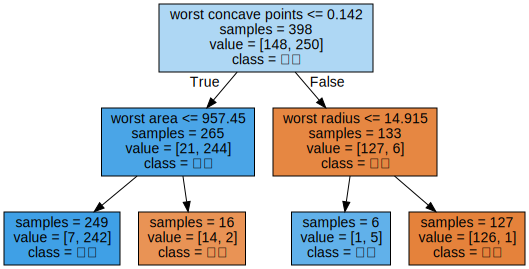

In [ ]:
with open("tree.dot") as f:
  dot_graph = f.read()
  
display(graphviz.Source(dot_graph))

In [ ]:
import numpy as np

In [ ]:
def plot_feature_imp_cancer(model):
    n_features = cancer.data.shape[1]
    imp = model.feature_importances_
    plt.barh(range(n_features) , imp, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

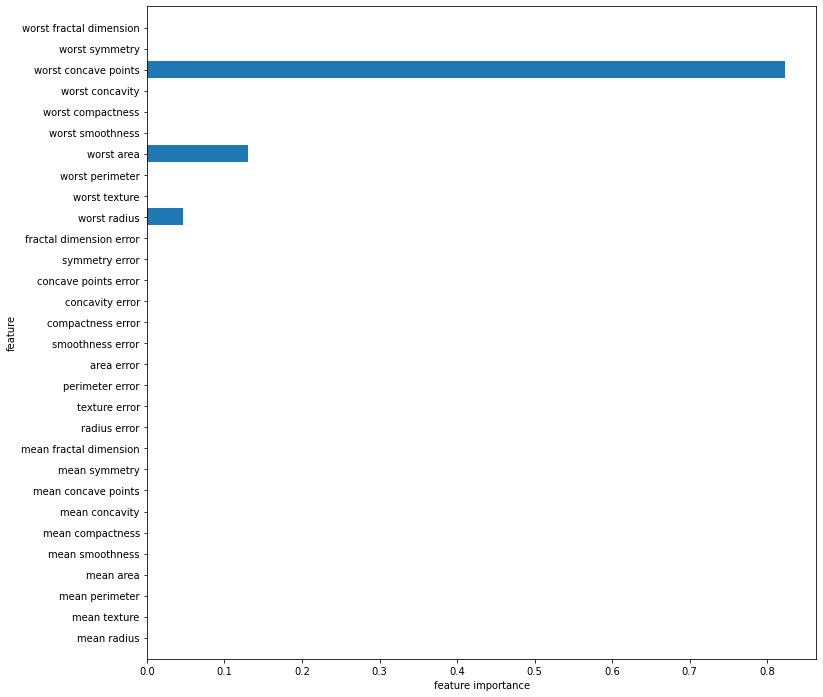

In [ ]:
plt.figure(figsize=(12,12))
plot_feature_imp_cancer(tree)